In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Read dataset into python environment

In [2]:
data=pd.read_csv('StudentsPerformance.csv')

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [4]:
data.isnull().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

# Number of males and females in participated in the test

In [5]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

# Parental level of education

In [6]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

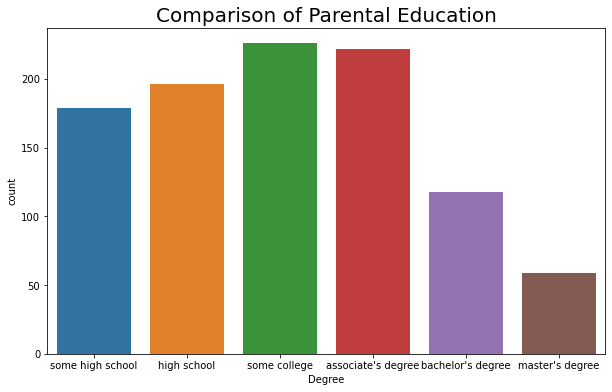

In [100]:
plt.figure(figsize=(10,6))
sns.countplot(data['parental level of education'])
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

In [7]:
pd.pivot_table(data, values='writing score',index='parental level of education', columns='lunch',aggfunc='mean')

lunch,free/reduced,standard
parental level of education,,
associate's degree,66.415584,71.951724
bachelor's degree,69.227273,75.851351
high school,56.971429,65.420635
master's degree,69.875000,79.657143
some college,63.911392,71.789116
some high school,57.622951,68.644068


# Mean of each scores

In [101]:
data.mean()

math score       66.001
reading score    69.195
writing score    68.119
dtype: float64

# Mean of scores based on gender

In [9]:
data[['gender','math score','reading score','writing score']].groupby(['gender'], as_index =True).mean().sort_values(['math score','reading score','writing score'],ascending =False)

,math score,reading score,writing score
gender,,,
male,68.821577,65.545643,63.446058
female,63.376448,72.590734,72.467181


# Mean of scores based on Test preparation course

In [10]:
data[['test preparation course','math score','reading score','writing score']].groupby(['test preparation course']).mean().sort_values(by=['math score','reading score','writing score'],ascending = False)

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


# Most average of scores based on gender and Test preparation course

In [79]:
data[['test preparation course','gender','math score','reading score','writing score']].groupby(['test preparation course','gender']).mean().sort_values(by=['math score','reading score','writing score'],ascending = True)

math score  reading score  writing score
test preparation course gender                                          
none                    female   61.320359      69.955090      68.982036
                        male     66.467532      62.581169      59.551948
completed               female   67.108696      77.375000      78.793478
                        male     72.988506      70.793103      70.339080

# Variance of score based on gender

In [12]:
data[['gender','math score','reading score','writing score']].groupby(['gender']).std().sort_values(by=['math score','reading score','writing score'],ascending = False)

,math score,reading score,writing score
gender,,,
female,16.029928,14.411018,14.844842
male,14.556411,14.149594,14.227225


# Variation of scores based on Test preparation course

In [13]:
data[['test preparation course','math score','reading score','writing score']].groupby(['test preparation course']).std().sort_values(by=['math score','reading score','writing score'],ascending = False)

,math score,reading score,writing score
test preparation course,,,
none,15.705689,14.608896,15.041667
completed,14.521847,13.537572,13.236412


# Scoring variation based on Test preparation course and gender

In [14]:
data[['test preparation course','gender','math score','reading score','writing score']].groupby(['test preparation course','gender']).std().sort_values(by=['math score','reading score','writing score'],ascending = False)

,,math score,reading score,writing score
test preparation course,gender,,,
none,female,16.510686,14.636981,15.016497
completed,female,14.428233,12.695493,12.240788
none,male,14.335746,13.595718,13.468284
completed,male,14.039164,13.612420,12.887910


# Students with top score in maths

In [93]:
data1=data.nlargest(250,'math score')
data1

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
515,female,group E,some college,standard,none,100,92,97
516,female,group E,bachelor's degree,standard,none,100,100,100
517,female,group E,associate's degree,standard,none,100,100,100
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
...,...,...,...,...,...,...,...,...
428,female,group D,some college,free/reduced,none,77,86,86
429,female,group E,some high school,standard,none,77,79,80
849,male,group A,bachelor's degree,standard,none,77,67,68
850,male,group C,associate's degree,free/reduced,none,77,67,64


# Count plot of Top 25% students based on math score

Text(0, 0.5, 'count')

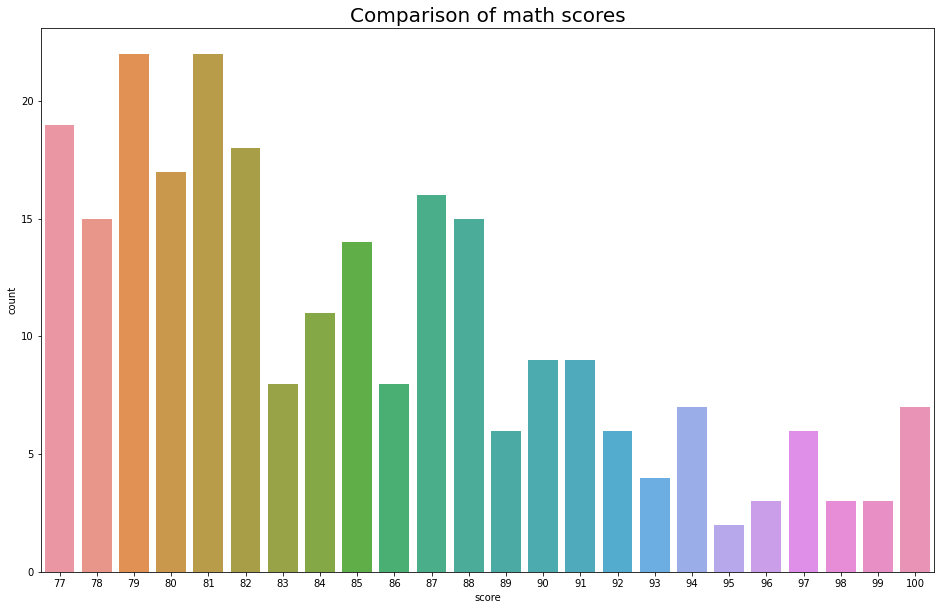

In [106]:
plt.figure(figsize=(16,10))
sns.countplot(data1['math score'])
plt.title('Comparison of math scores', fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')

# Bar plot of students based on reading score

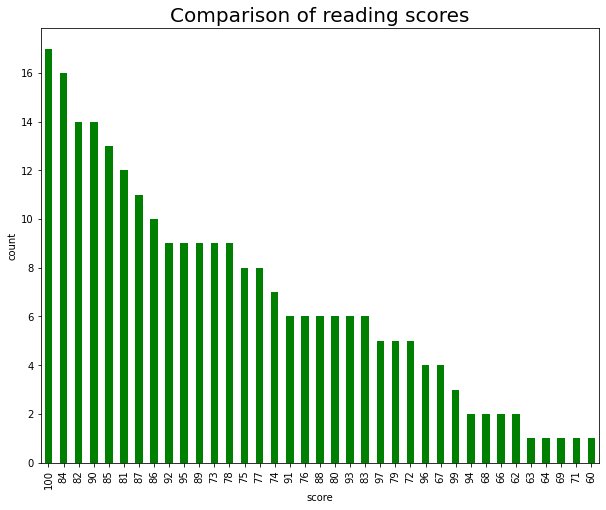

In [118]:
plt.figure(figsize=(10,8))
data1['reading score'].value_counts().plot(kind='bar',color='green')
plt.title('Comparison of reading scores', fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

# Bar plot of writing score

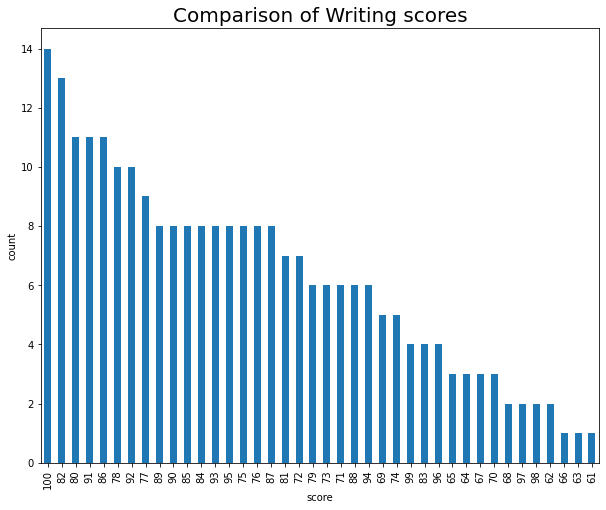

In [119]:
plt.figure(figsize=(10,8))
data1['writing score'].value_counts().plot(kind='bar')
plt.title('Comparison of Writing scores', fontweight = 30, fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

# Count plot of Parental education vs Test preparation course

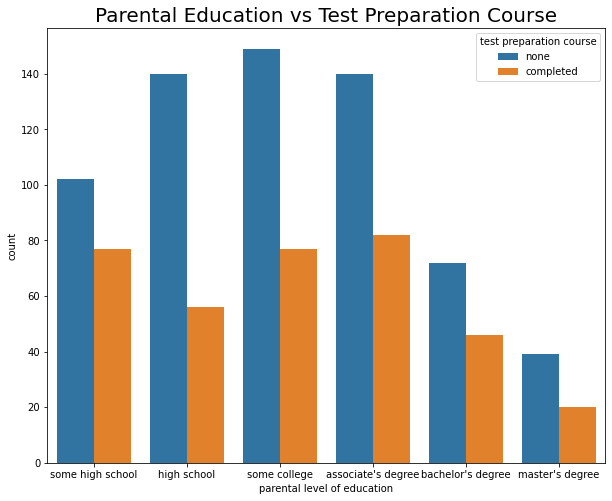

In [122]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'parental level of education', data = data, hue = 'test preparation course')
plt.title('Parental Education vs Test Preparation Course', fontsize = 20)
plt.show()

# Count plot of race vs gender

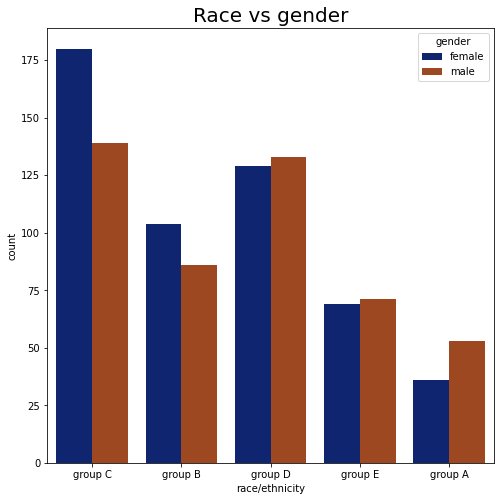

In [126]:
plt.figure(figsize=(8,8))
sns.countplot(x = 'race/ethnicity', data = data,  hue = 'gender',palette='dark')
plt.title('Race vs gender', fontweight = 30, fontsize = 20)
plt.show()